## 300_RQ3

"What month has the highest release rate and does this correlate with overall sales and performance of a game".

### Purpose

In this notebook we will return to our third research question where will we will analyse the highest release month in terms of the release rates and does this result correlate with the overall sales and performance of a game. We will see what months have the best sales in each region 
- Best Sales month 
- Highest scored months 
- monthly scores vs releases
- Top 5 genre monthly sales
- Average sales
- games per month vs sales per month

#### Datasets

- Input : 300_RQ3.pkl
- Output : N/A

In [1]:
import os 
import sys
import pandas as pd
import numpy as np 
import hashlib 
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline 

In [2]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, linees, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.rcParams['axes.grid'] = True

plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['legend.fontsize'] = 22

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

As seen above we defined everything we needed for our matplotlib configuration. We will now import the required dataset we will need for analyses. I then store it in a dataframe called analyses which will store the combined dataset in.  

In [3]:
if not os.path.exists("../../data/prep/Clean_Combined.pkl"):
    print("Missing Dataset File")
    

In [4]:
analyses  = pd.read_pickle("../../data/prep/Clean_Combined.pkl")

In [5]:
# Im grouping the analyses dataframe by the index and converting the time into a full month name argument and counting
# the number of publishers that get released each month. 

month= analyses.groupby(analyses.index.strftime('%B'))['Publisher'].count()

Text(0,0.5,'Number of Releases')

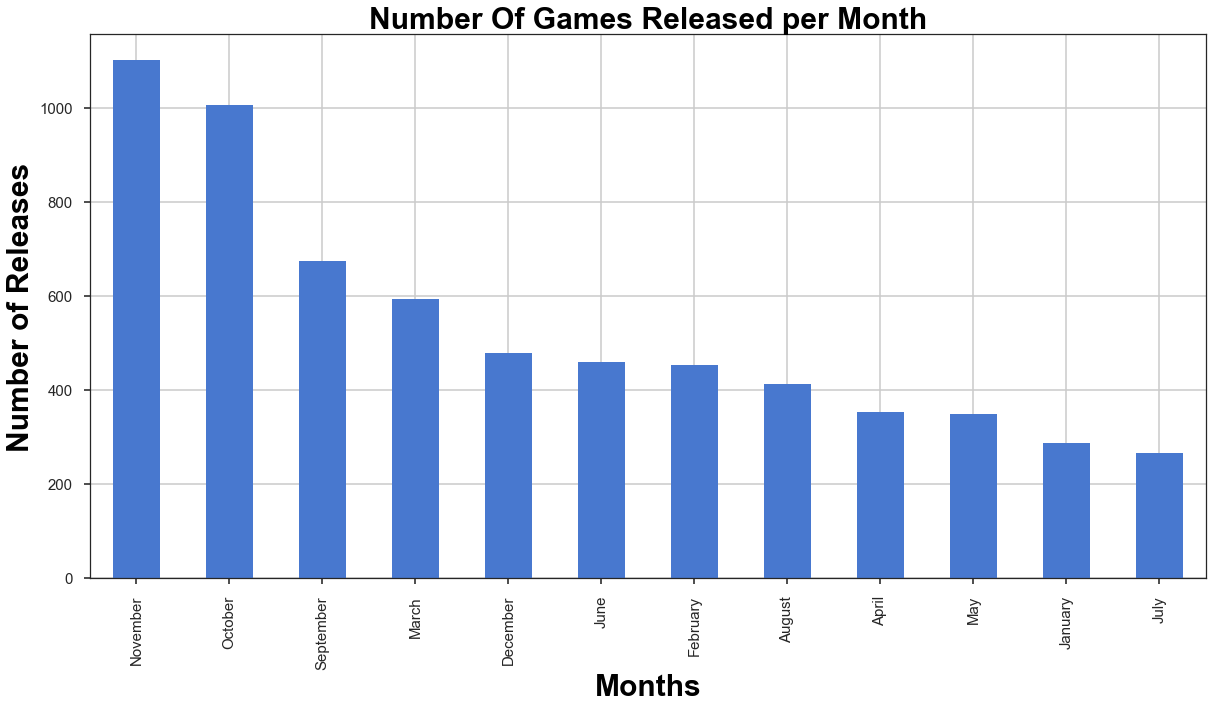

In [6]:
# Then we plot the number of publishers on a bar chart by the highest value first
ax = month.sort_values(ascending=False).plot(kind='bar', figsize=(20,10))
ax.set_title('Number Of Games Released per Month', size=30)
ax.set_xlabel("Months", size=30)
ax.set_ylabel("Number of Releases",size=30)

##  Games Per Month By Region

Text(0.5,1,'Regional Sales By Month')

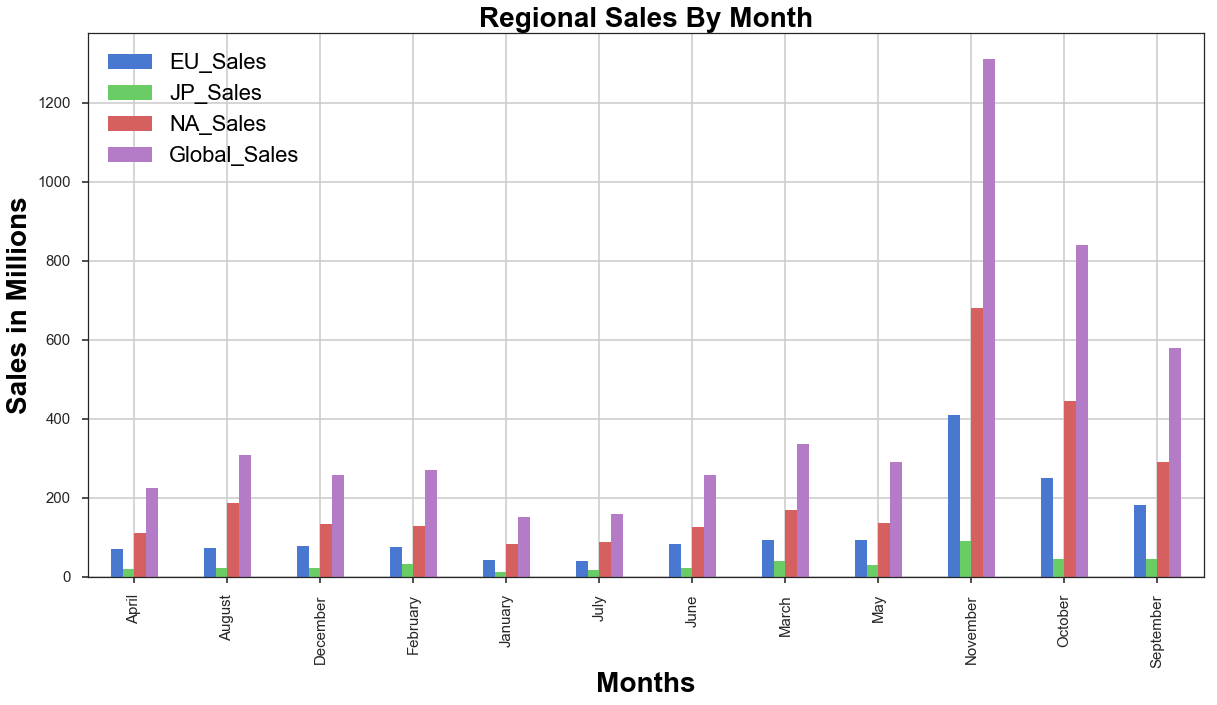

In [7]:
# Now I will do the same thing as above except I will store each monthly sales in a dataframe for each separate region
# Since each region has all the same months I will concat the dataframes for eu, jp, na and globe into a sales_df
# dataframe and concat them on axis = 1. I will then plot the concatenated dataframe and 

eu = analyses.groupby(analyses.index.strftime('%B'))[['EU_Sales']].sum()
jp = analyses.groupby(analyses.index.strftime('%B'))[['JP_Sales']].sum()
na = analyses.groupby(analyses.index.strftime('%B'))[['NA_Sales']].sum()
globe = analyses.groupby(analyses.index.strftime('%B'))[['Global_Sales']].sum()

sales_df = pd.concat([eu, jp, na, globe], axis=1)
ax = sales_df.plot(kind='bar')
ax.set_ylabel("Sales in Millions")
ax.set_xlabel("Months")
ax.set_title("Regional Sales By Month")

### European Sales

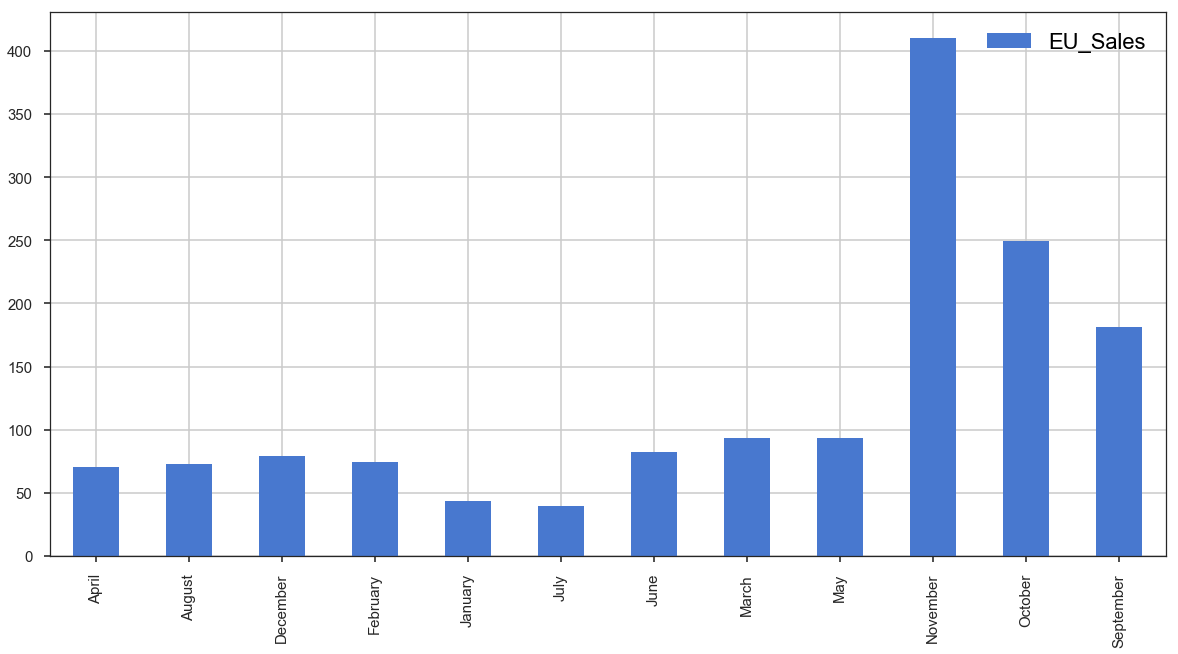

In [8]:
eu.plot(kind='bar', figsize=(20,10))


### North American Sales

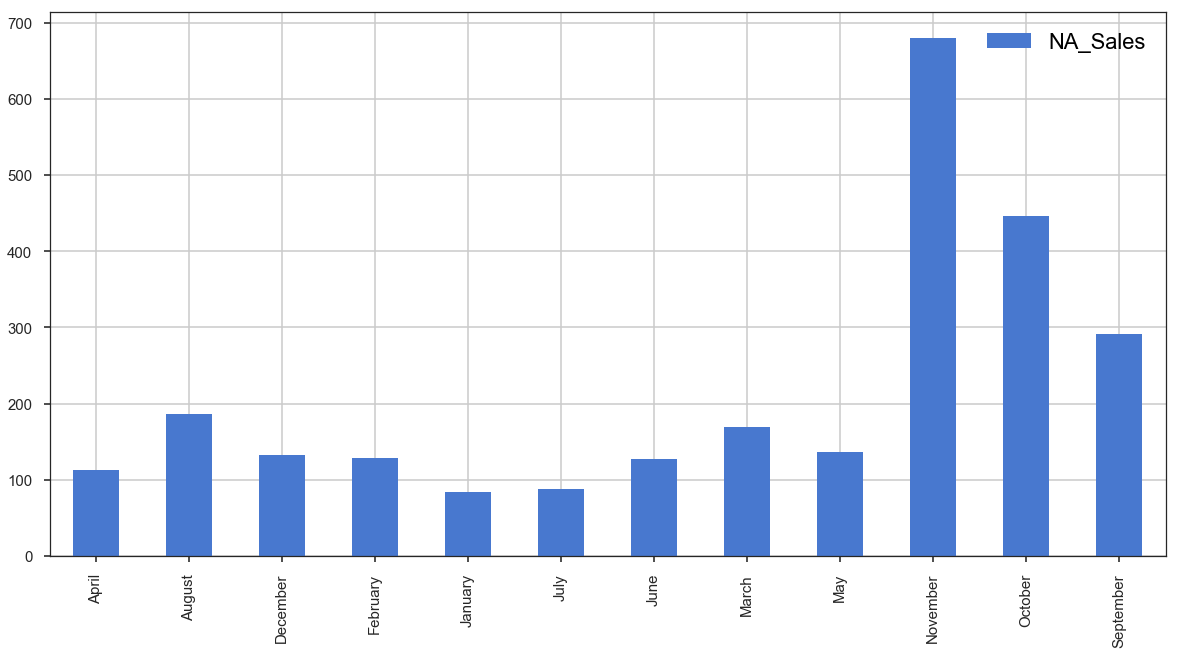

In [9]:
na.plot(kind='bar', figsize=(20,10))


### Global Sales

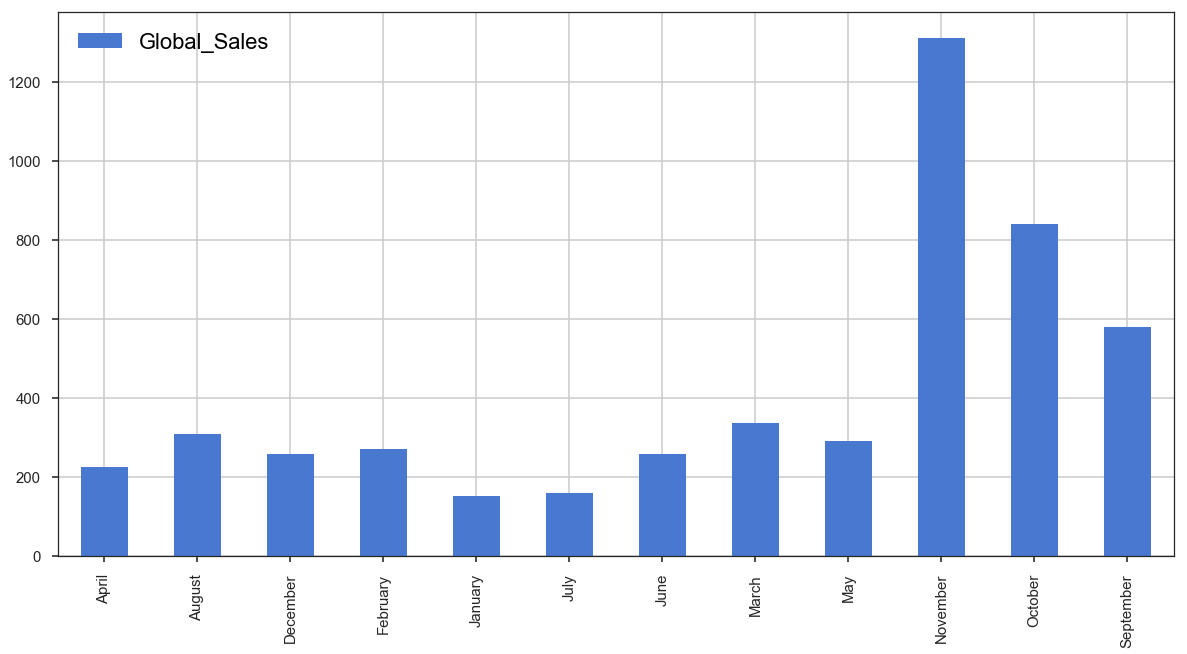

In [10]:
globe.plot(kind='bar', figsize=(20,10))

### Japanese sales

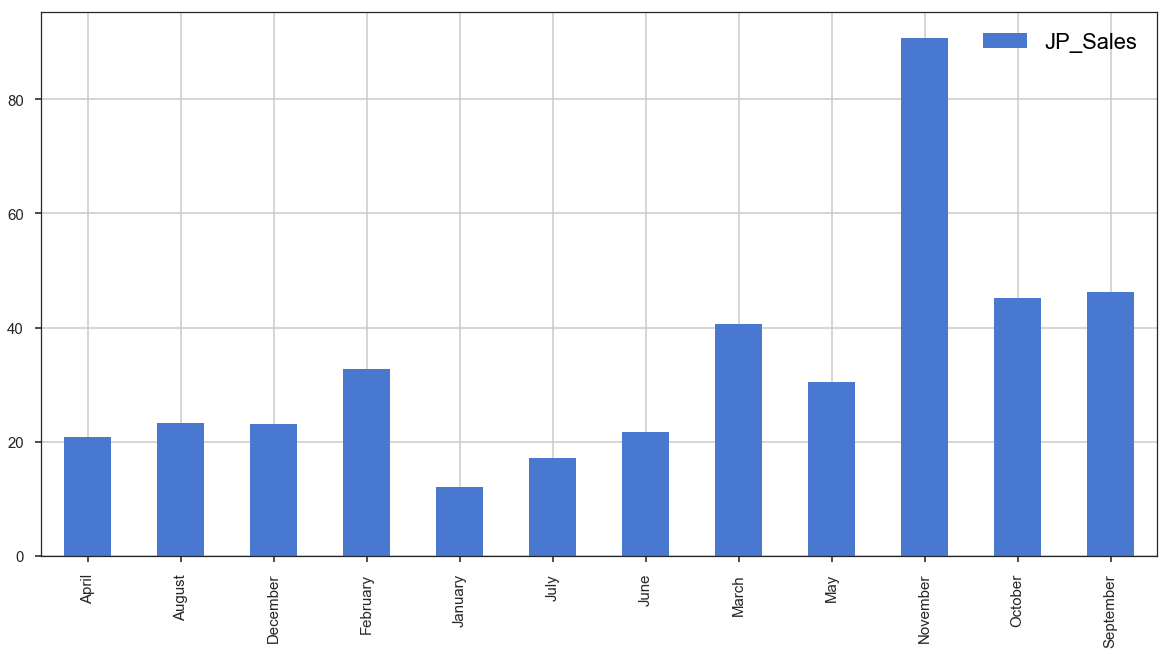

In [11]:
jp.plot(kind='bar', figsize=(20,10))

### Average Sales per month 

We analyse the monthly average sales for each full month name. So what we will do is count the number of games released per month and also sum the monthly global sales. We stored both of these in two different dataframes. Then create a new dataframe called avg which will divide the global monthly sales by the number of games per month and this will get us the average sales per  month

In [12]:
games_by_month = analyses.groupby(analyses.index.strftime('%B'))['Genre'].count()
Global = analyses.groupby(analyses.index.strftime('%B'))['Global_Sales'].sum()

# Average of the global sales total and divided it by the number of games released per month to find the average releases per month
avg = Global / games_by_month

Then plot this average sales per month on a graph and show the % sales for each piece. As seen again November dominates the average sales for each month followed by september and october. 

Text(0.5,0,'Months')

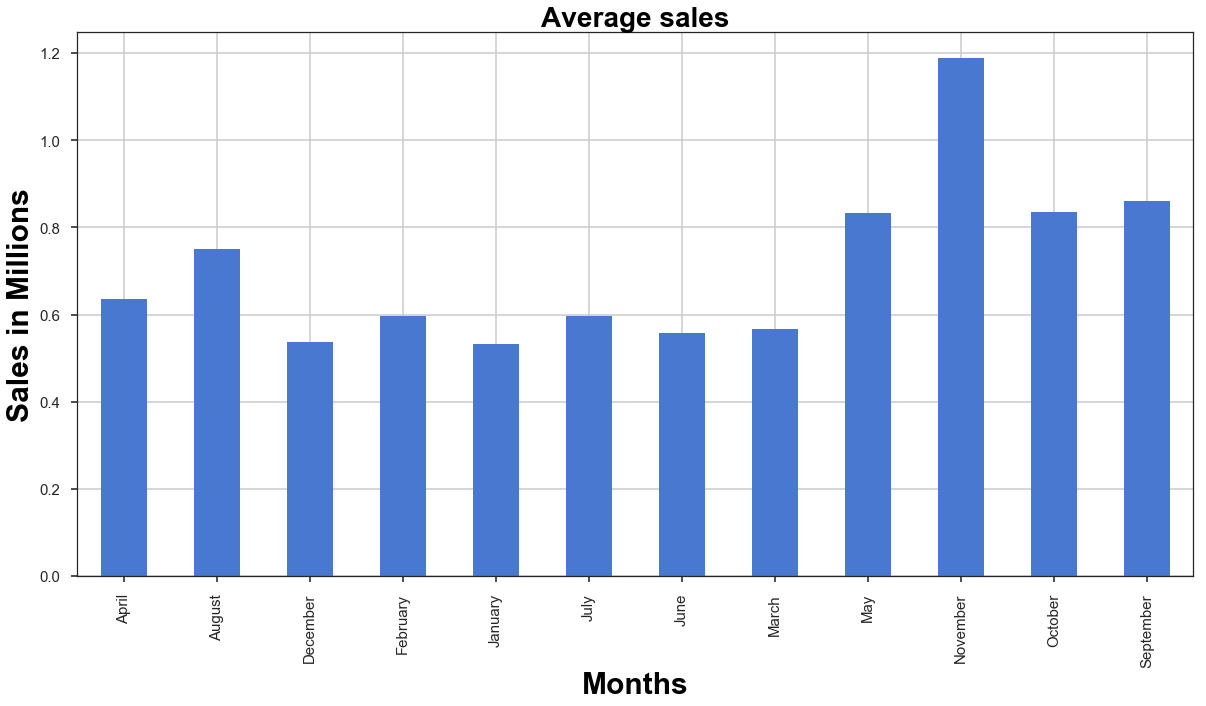

In [13]:
ax = avg.plot(kind= 'bar', figsize=(20,10))
ax.set_title("Average sales")
ax.set_ylabel("Sales in Millions", size=30)
ax.set_xlabel("Months", size=30)

## Highest scored Month 

Now lets analyse and check the highest scored month. What we will do again is convert the timeseries and index it so the string is returned by full month names and will sum the scores for each full month name. This is stored in a dataframe called mont. 

In [14]:
# the sum of the scores for each month 
mont = analyses.groupby(analyses.index.strftime('%B'))[['score']].sum()


This dataframe will then be plotted on a horizontal bar chart with months on the y axis and score counts on the x axis. Again we can see that October and November are the highest scored months. Where as July and January are the lowest scored months. 

Text(0.5,1,'Highest Scored month')

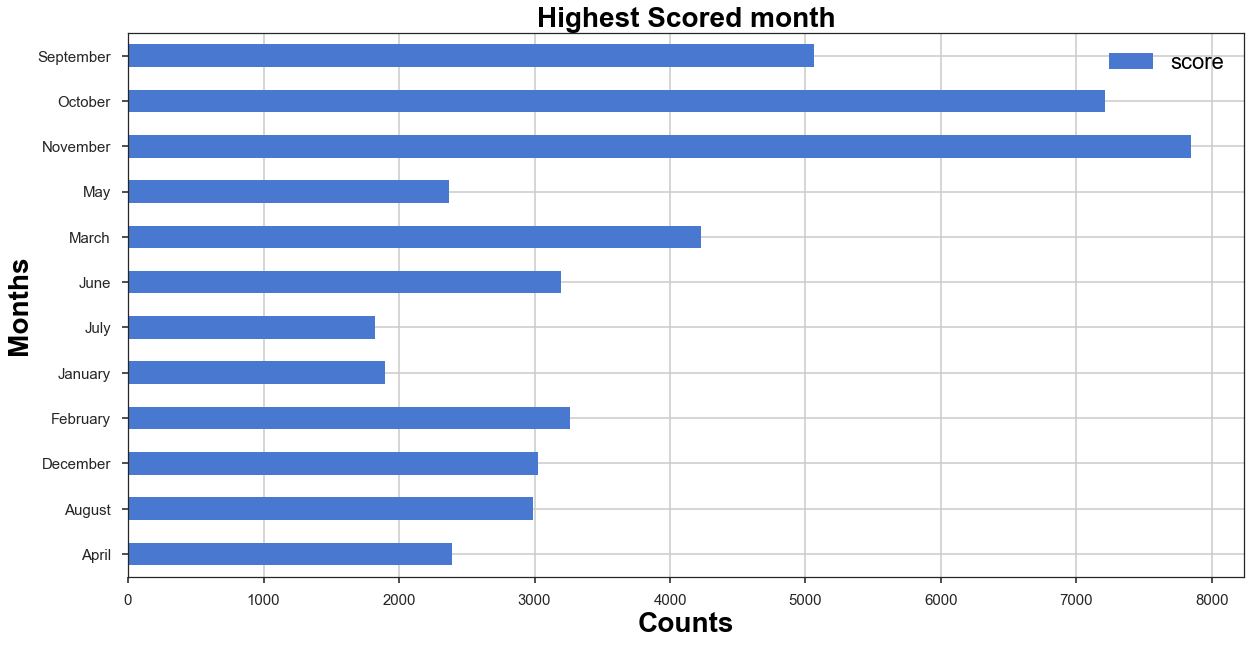

In [15]:
# Horizonal bar chart to represent the highest scored month. 
ax= mont.plot(kind='barh')
ax.set_xlabel("Counts")
ax.set_ylabel("Months")
ax.set_title("Highest Scored month")

### Genre by Month 

We will now analyse the best selling genres by month. We will check the first 5 lines of the analyses dataframe using .head(). 


In [16]:
analyses.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,score_phrase,score,editors_choice
Date,,,,,,,,,,,,
2006-11-13,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Good,7.5,N
2008-04-20,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Great,8.5,Y
2009-07-16,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Good,7.7,N
2006-05-06,New Super Mario Bros.,DS,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,Amazing,9.5,Y
2009-11-13,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,Great,8.9,Y


We will now locate all the genres in the dataframe by searching for each dataframe and storing it in a new variable that represents that genre. Once we have all the variables stored for each genre category. It will be possible to count the number of that genre category released per month.

In [17]:
roleplaying = analyses[analyses['Genre'] == 'Role-Playing']
adventure = analyses[analyses['Genre'] == 'Adventure']
misc = analyses[analyses['Genre'] == 'Misc']
platform = analyses[analyses['Genre'] == 'Platform']
puzzle = analyses[analyses['Genre'] == 'Puzzle']
race = analyses[analyses['Genre'] == 'Racing']
shoot = analyses[analyses['Genre'] == 'Shooter']
simulation = analyses[analyses['Genre'] == 'Simulation']
sports = analyses[analyses['Genre'] == 'Sports']
strategy = analyses[analyses['Genre'] == 'Strategy']
act = analyses[analyses['Genre'] == 'Action']

I will now create a new variable for each genre category which will again use strftime to convert the string into a full month argument and count the global sales of that genre for each month. Each genre will be stored in its own dataframe which will then be possible to concatenate the dataframes together and see the trends of each genre with one another. 

In [18]:
role= roleplaying.groupby(roleplaying.index.strftime('%B'))[['Genre']].count()



In [19]:
# creating a new dataframe to store each genre and group them by strftime to a full month name and count the global sales for each month 
adv = adventure.groupby(adventure.index.strftime('%B'))[['Global_Sales']].count()
mis = misc.groupby(misc.index.strftime('%B'))[['Global_Sales']].count()
plat= platform.groupby(platform.index.strftime('%B'))[['Global_Sales']].count()
puzz = puzzle.groupby(puzzle.index.strftime('%B'))[['Global_Sales']].count()
rac = race.groupby(race.index.strftime('%B'))[['Global_Sales']].count()
shot= shoot.groupby(shoot.index.strftime('%B'))[['Global_Sales']].count()
sim= simulation.groupby(simulation.index.strftime('%B'))[['Global_Sales']].count()
sport = sports.groupby(sports.index.strftime('%B'))[['Global_Sales']].count()
strat = strategy.groupby(strategy.index.strftime('%B'))[['Global_Sales']].count()
acti = act.groupby(act.index.strftime('%B'))[['Global_Sales']].count()

In [20]:

# Renaming the dataframe to match each genre category. Had to rename the dataframe otherwise it didnt have a name and was left as a null. 
role['Role-playing']= roleplaying.groupby(roleplaying.index.strftime('%B'))[['Genre']].count()
adv['Adventure'] = adventure.groupby(adventure.index.strftime('%B'))[['Global_Sales']].count()
mis['Misc'] = misc.groupby(misc.index.strftime('%B'))[['Global_Sales']].count()
plat['Platform'] = platform.groupby(platform.index.strftime('%B'))[['Global_Sales']].count()
puzz['Puzzle'] = puzzle.groupby(puzzle.index.strftime('%B'))[['Global_Sales']].count()
rac['Racing'] = race.groupby(race.index.strftime('%B'))[['Global_Sales']].count()
shot['Shooter'] = shoot.groupby(shoot.index.strftime('%B'))[['Global_Sales']].count()
sim['Simulation'] = simulation.groupby(simulation.index.strftime('%B'))[['Global_Sales']].count()
sport['Sport'] = sports.groupby(sports.index.strftime('%B'))[['Global_Sales']].count()
strat['Strategy'] = strategy.groupby(strategy.index.strftime('%B'))[['Global_Sales']].count()
acti['Action'] = act.groupby(act.index.strftime('%B'))[['Global_Sales']].count()

In [21]:
# Finally concatenating the dataframes together so it will be easier to have a full table to see how many of each 
# genre gets released per month
genre_df = pd.concat([role['Role-playing'], adv['Adventure'],
                      mis['Misc'], plat['Platform'],
                      puzz['Puzzle'], rac['Racing'],
                      shot['Shooter'], sim['Simulation'],
                      sport['Sport'],
                      strat['Strategy'],acti['Action']], axis=1)

In [22]:
# Printing and checking the concatenated dataframe together to see if everything worked correctly.
genre_df

,Role-playing,Adventure,Misc,Platform,Puzzle,Racing,Shooter,Simulation,Sport,Strategy,Action
April,35,23,17,15,17,35,52,10,55,14,63
August,35,13,15,24,14,39,45,10,113,14,82
December,29,28,45,29,26,57,34,32,67,12,94
February,49,12,21,23,13,37,61,20,71,24,87
January,37,20,25,19,9,23,25,15,45,7,50
July,28,12,10,8,6,23,18,13,58,13,65
June,41,19,25,32,17,49,53,20,41,18,120
March,47,23,24,25,12,52,76,38,107,33,124
May,33,4,10,21,9,35,54,9,30,15,113
November,64,35,95,91,24,98,169,63,154,33,209


As seen above everything is concatenated properly. We have all the 11 genres in one single table and we can see exactly how many of each genre gets released per month. We have all the months and the corresponding values for each genre beside the month. Now we we will plot this on a line graph to visualise what genres perform better.  

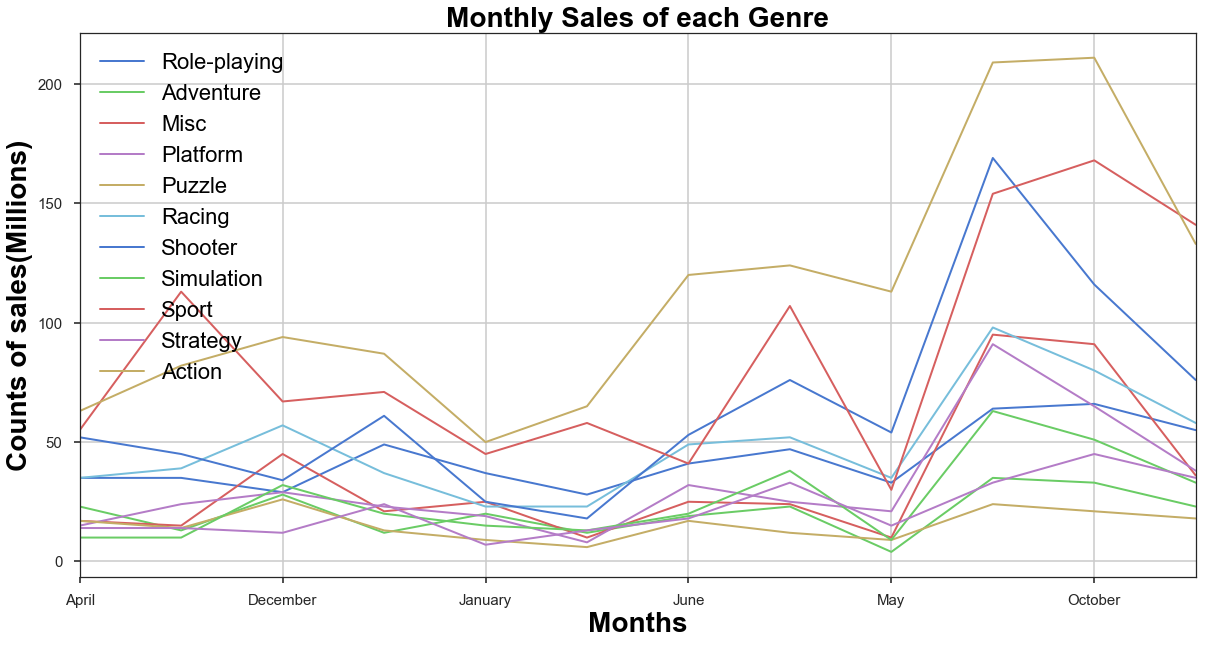

In [23]:
# Line chart to show the monthly sales for each genre. 
ax = genre_df.plot(kind='line')
ax.set_title("Monthly Sales of each Genre")
ax.set_ylabel("Counts of sales(Millions)")
ax.set_xlabel("Months")
ax.legend(loc='upper left', shadow=True)

As we can see from the above line graph, the graph is very clustered as there is too much going on. What we decided to do is concatenate the top 5 selling genres into a new datadrame called top5_genre. This will only store the genres of roleplaying, shooter , action, misc, and sport. Once we have these concatenated we will visualise the top 5 selling genres on a graph. 

In [24]:
# Concat the top 5 selling genres in terms of sales numbers into a new dataframe called top5_genre
top5_genre = pd.concat([role['Role-playing'],shot['Shooter'], acti['Action'],
                        mis['Misc'],  sport['Sport']],axis=1)

Text(0,0.5,'Sales Figures')

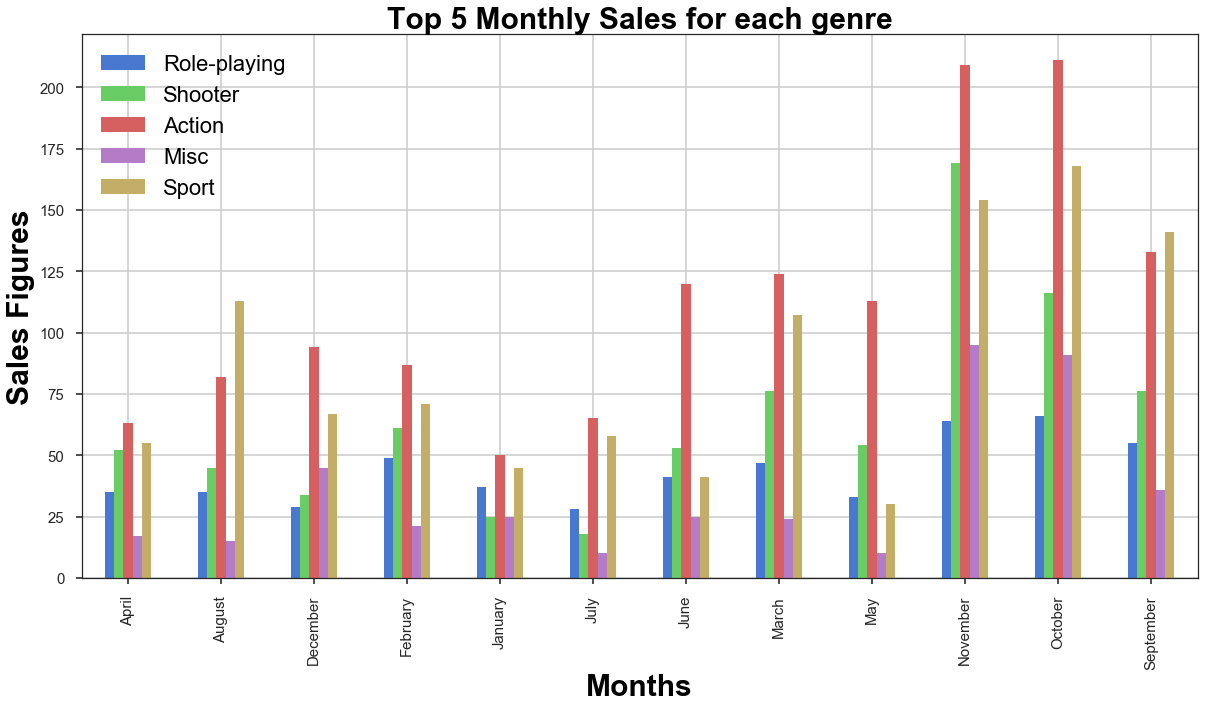

In [25]:
# Plot the top 5 genres and compare which one does better. 
ax = top5_genre.plot(kind='bar', figsize=(20,10))
ax.set_xlabel("Months", size=30)
ax.set_title("Top 5 Monthly Sales for each genre", size =30)
ax.set_ylabel("Sales Figures", size=30)

As seen above we have plotted our top 5 genres for each monthly sales. As we can see November and October have the highest release rates meaning that these are the best months to release a video game. In comparison January and July are the worst months to release a game with the sales at their all time lowest for each genre category. 

In [30]:
# storing the global sales for each month in a dataframe called tst which counts the total sales by month.
tst =analyses.groupby(analyses.index.strftime('%B'))[['Global_Sales']].sum()
tst

,Global_Sales
April,224.97
August,309.55
December,257.19
February,270.50
January,152.54
July,158.69
June,256.77
March,336.30
May,289.56
November,1309.46


In [31]:
# Hold games per month 
tst['Games Per Month'] = analyses.groupby(analyses.index.strftime('%B'))[['Name']].count()

In [32]:
# Concatenating the tet[games per month] and the mont dataframes.
# Overall will display the number of games per month and the sum of the scores. 
overall = pd.concat([tst['Games Per Month'], mont], axis=1)
overall

,Games Per Month,score
April,354,2389.2
August,413,2987.7
December,479,3026.8
February,453,3261.4
January,286,1897.6
July,266,1823.3
June,460,3192.7
March,594,4230.0
May,348,2365.4
November,1102,7844.3


We will now plot the monthly scores vs the monthly releases to analyse the highest scored months and the number of releases that month. Again November and October dominate the graph with the highest amount of scores and the highest amount of releases. The trend is again the same with January and July with the lowest scores and the lowest releases

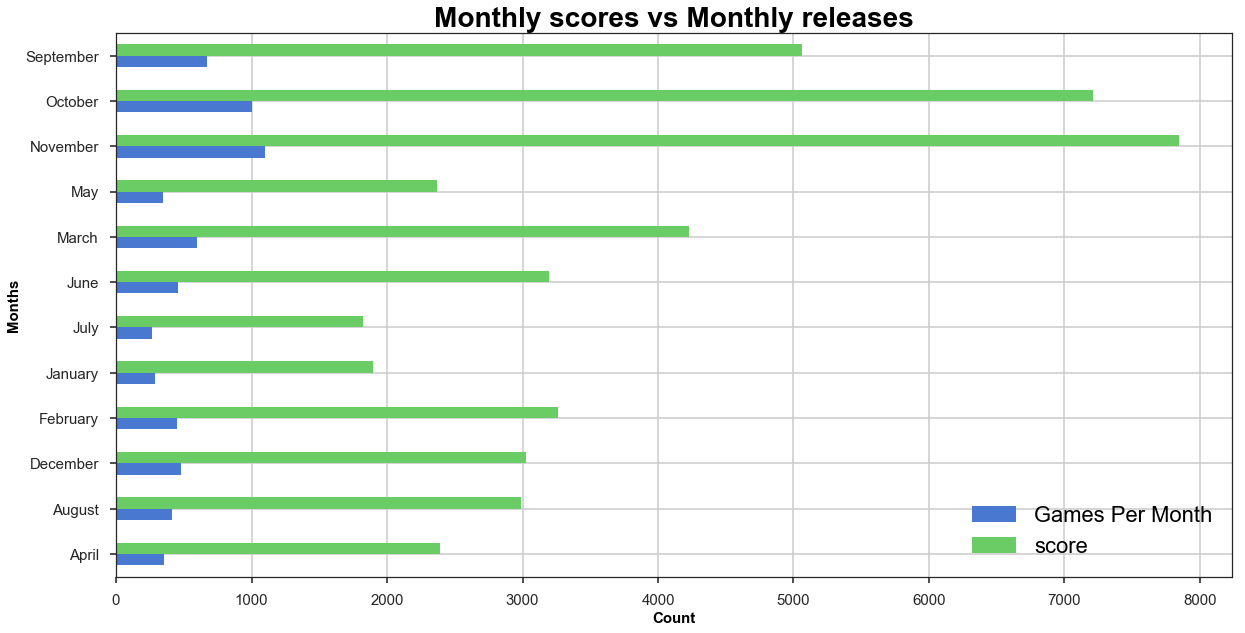

In [33]:
# Horizontal bar chart to represent the monthly scores and the monthly releases 
ax = overall.plot(kind='barh')
ax.set_title("Monthly scores vs Monthly releases")
ax.set_ylabel("Months", size=15)
ax.set_xlabel("Count", size=15)
ax.legend()

What we would like to visualise now is the number of games per month vs the global sales per month. We would like to see if it is better to release a game where there are less releases meanin less competition in comparison to months where there are more releases

In [35]:
# I would like to concatenate the two dataframes containig the games per month and the global sales for each month.
over = pd.concat([tst['Games Per Month'], tst], axis=1)
over

,Games Per Month,Global_Sales,Games Per Month
April,354,224.97,354
August,413,309.55,413
December,479,257.19,479
February,453,270.50,453
January,286,152.54,286
July,266,158.69,266
June,460,256.77,460
March,594,336.30,594
May,348,289.56,348
November,1102,1309.46,1102


Text(0,0.5,'Months')

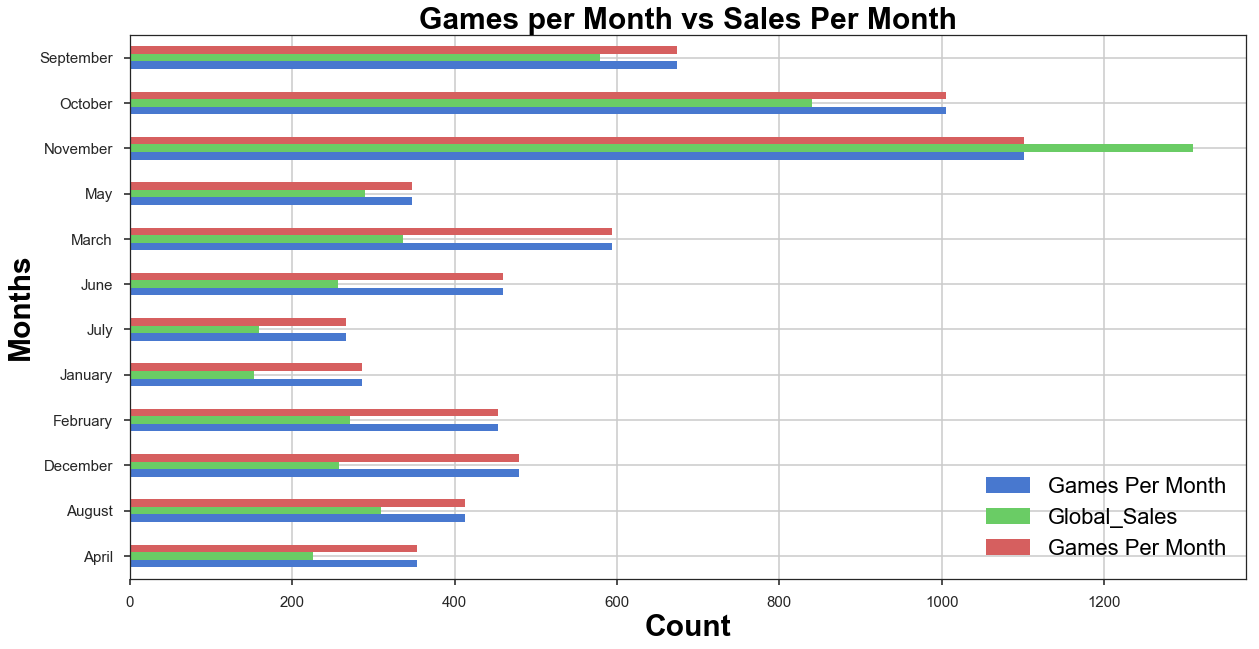

In [36]:
# Plotting a horizontal bar chart containing the games per month vs the sales per month
ax = over.plot(kind='barh', figsize=(20,10))
ax.set_title("Games per Month vs Sales Per Month", size=30)
ax.set_xlabel("Count", size=30)
ax.set_ylabel("Months", size=30)

As we can see from the horizontal bar chart November is the only month that has more sales than releases. This means that there is a higher average sales amount per month in November. This indicates that November is the best month to release a game as it indicates a higher sales per game. This is the only month in this case. Every other month has more releases than global sales indicating a lower average sales amount. 

In [ ]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())